In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from imageio import imread
import warnings
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from IPython.display import display
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package stopwords to /home/renato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stop_words = set(stopwords.words("portuguese"))
stop_words.update(['que', 'até', 'esse', 
                    'essa', 'pro', 'pra',
                    'oi', 'lá', 'blá', 'dos', 'esta'])
const_words = [ 'de','a','o','que','e','do','da','em','um','para','e','com','nao','uma','os','no','se','na','por','mais','as','dos','como','mas','foi','ao','ele','das','tem','a','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo','pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse','eles','estao','voce','tinha','foram','essa','num','nem','suas','meu','as','minha','tem','numa','pelos','elas','havia','seja','qual','sera','nos','tenho','lhe','deles','essas','esses','pelas','este','fosse','dele','tu','te','voces','vos','lhes','meus','minhas','teu','tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles','aquelas','isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera','estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos','hao','houve','houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos','houverem','houverei','houvera','houveremos','houverao','houveria','houveriamos','houveriam','sou','somos','sao','era','eramos','eram','fui','foi','fomos','foram','fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos','serao','seria','seriamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham','tive','teve','tivemos','tiveram','tivera','tiveramos','tenha','tenhamos','tenham','tivesse','tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria','teriamos','teriam','a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]
wrd = [w for w in const_words if w not in stop_words]
# contem 593 stop words em portugues
stop_words.update(wrd)

In [3]:
df = pd.read_csv('../Dados coletados/Primeiras semanas/G1.csv')

df.head()

,ID,TITLE,LINK,SUMMARY,PUBLISHED
0,11,Confira o 2º dia de desfiles da Festlingerie J...,https://g1.globo.com/mg/sul-de-minas/festlinge...,"<img src=""https://s2.glbimg.com/i-uqwYxqUJOApB...","Tue, 22 Sep 2020 22:12:20 -0000"
1,12,Queimada consumiu 850 hectares do Parque Estad...,https://g1.globo.com/sp/sao-jose-do-rio-preto-...,"<img src=""https://s2.glbimg.com/o1U8CVISCkqRNp...","Tue, 22 Sep 2020 22:11:49 -0000"
2,13,Polícia investiga suspeita de mortes por inges...,https://g1.globo.com/se/sergipe/noticia/2020/0...,Três pessoas já morreram e outra está hospital...,"Tue, 22 Sep 2020 22:11:37 -0000"
3,14,Cadela abre buraco em raiz de árvore para ter ...,https://g1.globo.com/go/goias/noticia/2020/09/...,"<img src=""https://s2.glbimg.com/oZVJrG_qs35bZ8...","Tue, 22 Sep 2020 22:10:05 -0000"
4,15,PE confirma mais quatro casos e totaliza 22 re...,https://g1.globo.com/pe/pernambuco/noticia/202...,"<img src=""https://s2.glbimg.com/Gv9miVzhCl5Qtn...","Tue, 22 Sep 2020 22:09:31 -0000"


In [4]:

# remove special characters and digits
def clean_noticia(noticia):
   
    # remove links e alguns pontos
    noticia = re.sub(r'<img src="https\S+', "", noticia)
    noticia = re.sub(r'href\S+', "", noticia)
    noticia = re.sub(r'rel', "", noticia)
    noticia = re.sub(r'nofollow\S+', "", noticia)
    noticia = re.sub(r'mixvale\S+', "", noticia)
    noticia = re.sub(r'target\S+', "", noticia)
    noticia = re.sub(r'_blank\S+', "", noticia)
    noticia = re.sub(r'www\S+', "", noticia)
    noticia = re.sub(r"http\S+", "", noticia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    
    # remove alguns caracteres
    noticia  = re.sub("(\\d|\\W)+|\w*\d\w*"," ",noticia )
    noticia = ' '.join(s for s in noticia.split() if (not any(c.isdigit() for c in s)) and len(s) > 2)
    noticia = noticia.replace("\n", "")
    noticia = ' '.join([w for w in noticia.split() if w not in stop_words])
    return noticia

In [5]:
#considerando somente titulo
clean_noticias = []
for w in range(len(df.SUMMARY)):
  noticia = df['TITLE'].iloc[w]
  noticia = clean_noticia(noticia)
  clean_noticias.append(str(noticia))

#remover colunas repetidas
print(len(clean_noticias))
df['text'] = np.array(clean_noticias)
clean_noticias[:10]

2944


['confira desfiles festlingerie juruaia assista vídeo',
 'queimada consumiu hectares parque estadual aguapeí fundação',
 'polícia investiga suspeita mortes ingestão bebida alcoólica riachão dantas',
 'cadela abre buraco raiz árvore filhotes precisam resgatados bombeiros aparecida goiânia',
 'confirma casos totaliza registros síndrome inflamatória multissistêmica pediátrica',
 'eleições consultar título eleitor',
 'tabela elaborada procon sergipe comparativo preços cesta básica',
 'vivo assista jornal rondônia edição',
 'agências inss voltam funcionar ubá barbacena joão del rei',
 'denuncia exprefeito orlândia usurpação cargo público']

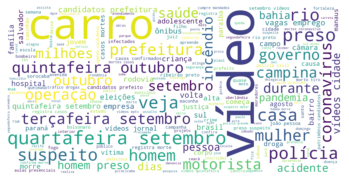

In [6]:
# word cloud

words = ' '.join(df['text'])
warnings.simplefilter('ignore')
#twitter_mask = imread('brasil_mask.png')

wc = WordCloud(min_font_size=10,
              max_font_size=300,
              background_color='white',
              mode="RGB",
              width=2000,
              height=1000,
              #mask=twitter_mask,
              normalize_plurals = True).generate(words)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Frequencia de palavras

In [27]:
# calcula afrequencia em que cada frase apparece no texto
frequencia = nltk.FreqDist(words.split())
frequencia

FreqDist({'vídeos': 264, 'setembro': 252, 'casos': 151, 'polícia': 129, 'homem': 128, 'quintafeira': 126, 'mortes': 120, 'preso': 116, 'veja': 112, 'rio': 112, ...})

In [38]:
# salva o top 10 frases que mais aparece
# ao ser convertido para lista a frequencia já fica ordenada de forma decrescente
top10 = [list(frequencia)[w] for w in range(10)]
top10

['vídeos',
 'setembro',
 'casos',
 'polícia',
 'homem',
 'quintafeira',
 'mortes',
 'preso',
 'veja',
 'rio']

In [42]:
df['freq_paavras'] = ', '.join(frequencia)
df

,ID,TITLE,LINK,SUMMARY,PUBLISHED,text,freq_paavras
0,11,Confira o 2º dia de desfiles da Festlingerie J...,https://g1.globo.com/mg/sul-de-minas/festlinge...,"<img src=""https://s2.glbimg.com/i-uqwYxqUJOApB...","Tue, 22 Sep 2020 22:12:20 -0000",confira desfiles festlingerie juruaia assista ...,"vídeos, setembro, casos, polícia, homem, quint..."
1,12,Queimada consumiu 850 hectares do Parque Estad...,https://g1.globo.com/sp/sao-jose-do-rio-preto-...,"<img src=""https://s2.glbimg.com/o1U8CVISCkqRNp...","Tue, 22 Sep 2020 22:11:49 -0000",queimada consumiu hectares parque estadual agu...,"vídeos, setembro, casos, polícia, homem, quint..."
2,13,Polícia investiga suspeita de mortes por inges...,https://g1.globo.com/se/sergipe/noticia/2020/0...,Três pessoas já morreram e outra está hospital...,"Tue, 22 Sep 2020 22:11:37 -0000",polícia investiga suspeita mortes ingestão beb...,"vídeos, setembro, casos, polícia, homem, quint..."
3,14,Cadela abre buraco em raiz de árvore para ter ...,https://g1.globo.com/go/goias/noticia/2020/09/...,"<img src=""https://s2.glbimg.com/oZVJrG_qs35bZ8...","Tue, 22 Sep 2020 22:10:05 -0000",cadela abre buraco raiz árvore filhotes precis...,"vídeos, setembro, casos, polícia, homem, quint..."
4,15,PE confirma mais quatro casos e totaliza 22 re...,https://g1.globo.com/pe/pernambuco/noticia/202...,"<img src=""https://s2.glbimg.com/Gv9miVzhCl5Qtn...","Tue, 22 Sep 2020 22:09:31 -0000",confirma casos totaliza registros síndrome inf...,"vídeos, setembro, casos, polícia, homem, quint..."
...,...,...,...,...,...,...,...
2939,23182,Ponta Grossa registra 205 denúncias de violênc...,https://g1.globo.com/pr/campos-gerais-sul/noti...,"<img src=""https://s2.glbimg.com/ohYkybFHldyqU8...","Thu, 01 Oct 2020 18:50:02 -0000",ponta grossa registra denúncias violência idos...,"vídeos, setembro, casos, polícia, homem, quint..."
2940,23183,Novos pedidos de seguro-desemprego nos EUA cae...,https://g1.globo.com/economia/noticia/2020/10/...,"<img src=""https://s2.glbimg.com/Iqz8MCYE_wKmR4...","Thu, 01 Oct 2020 18:49:01 -0000",pedidos segurodesemprego eua caem,"vídeos, setembro, casos, polícia, homem, quint..."
2941,23184,Coronavírus: decreto libera prática de esporte...,https://g1.globo.com/pr/norte-noroeste/noticia...,Espaços que alugam quadras terão que respeitar...,"Thu, 01 Oct 2020 18:47:19 -0000",coronavírus decreto libera prática esportes co...,"vídeos, setembro, casos, polícia, homem, quint..."
2942,23185,Delegado de Porto Seguro diz que carceragem ab...,https://g1.globo.com/ba/bahia/noticia/2020/10/...,"<img src=""https://s2.glbimg.com/wkH7vZFngpUqKp...","Thu, 01 Oct 2020 18:46:53 -0000",delegado porto seguro carceragem abriga presos...,"vídeos, setembro, casos, polícia, homem, quint..."
